In [1]:
import pandas as pd 

In [2]:
cancer = pd.read_csv('https://raw.githubusercontent.com/datasets/breast-cancer/master/data/breast-cancer.csv')

In [3]:
cancer.head()

,age,mefalsepause,tumor-size,inv-falsedes,falsede-caps,deg-malig,breast,breast-quad,irradiat,class
0,40-49,premefalse,15-19,0-2,True,3,right,left_up,False,recurrence-events
1,50-59,ge40,15-19,0-2,False,1,right,central,False,false-recurrence-events
2,50-59,ge40,35-39,0-2,False,2,left,left_low,False,recurrence-events
3,40-49,premefalse,35-39,0-2,True,3,right,left_low,True,false-recurrence-events
4,40-49,premefalse,30-34,3-5,True,2,left,right_up,False,recurrence-events


In [12]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [13]:
from sklearn.model_selection import train_test_split
x, y = load_breast_cancer(return_X_y=True)

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)


In [16]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

clf = DecisionTreeClassifier()

path = clf.cost_complexity_pruning_path(x_train, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0, 0.5, 'total impurity of leaves')

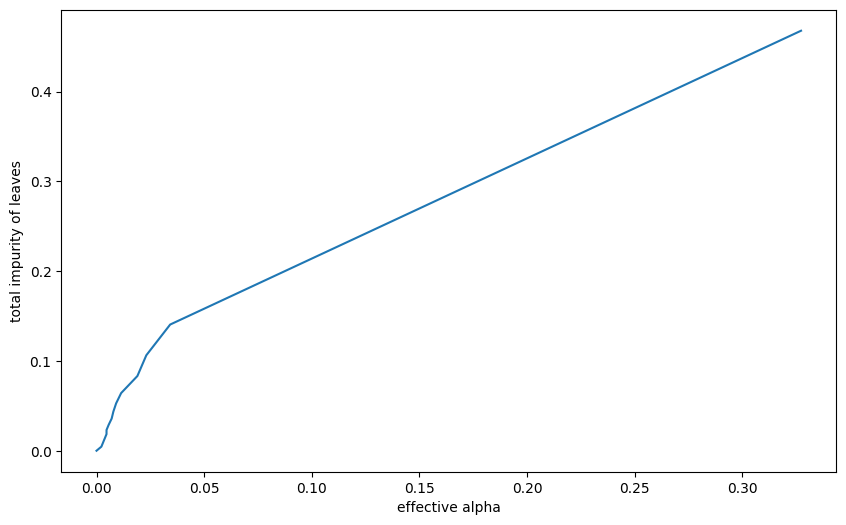

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")

In [18]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)


Text(0, 0.5, 'total depth')

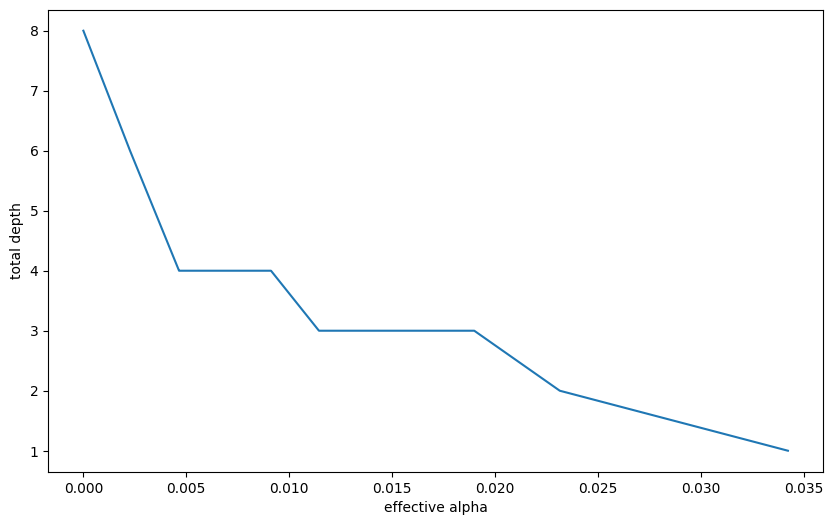

In [19]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("total depth")


In [20]:
from sklearn.metrics import accuracy_score

In [22]:
acc_scores = [accuracy_score(y_test, clf.predict(x_test)) for clf in clfs]

Text(0, 0.5, 'Accuracy scores')

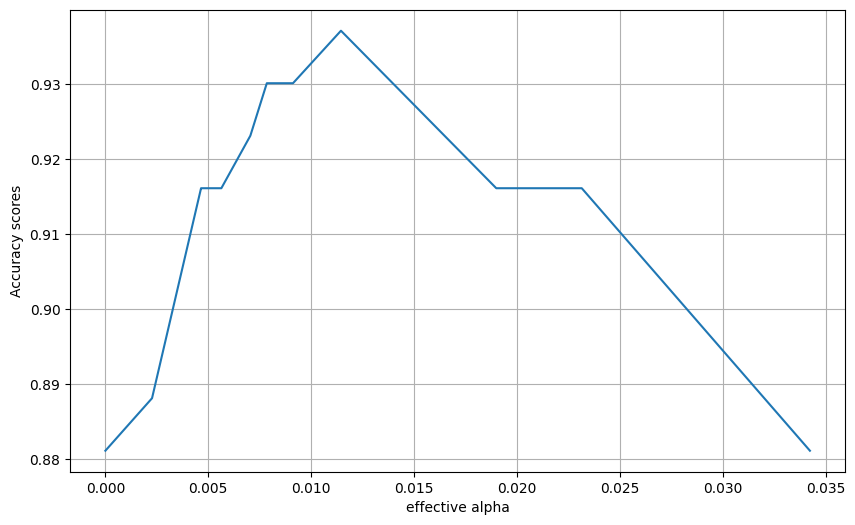

In [23]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")


In [25]:
model = DecisionTreeClassifier(ccp_alpha=0.013,random_state=0)
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.013, random_state=0)